# Tutorial 9a - Bulk elastic anisotropy

Although much of the SBS literature assumes that the elastic materials are isotropic, anisotropy of the elastic response can be an important effect. In general, anisotropy is often more significant in elastic physics than electromagnetic physics, because of the more involved tensor nature of the elastic theory. For instance, *cubic* materials such as silicon have an isotropic linear electromagnetic response but an anisotropic elastic linear response.

NumBAT supports arbitrary elastic nonlinearity in calculating elastic modes and the SBS gain of a waveguide. However, even the bulk elastic wave properties of anistropic materials is quite complex. This tutorial explores some of these effects. 

This exercise is most naturally performed interactively and so this example is written as a Jupyter notebook (see Tutorial 9 for an introduction to NumBAT in Jupyter).

## Theory

Bulk wave modes in linear elastic materials are found as eigen-solutions of the elastic wave equation for a uniform material.  
Starting from the elastic wave equation
$$
\nabla \cdot \bar{T} + \omega^2 \rho(x,y) \vec U = 0,
$$
and using the constitutive equation
$$
\bar{T} = \bar{c} : \bar{S} \qquad \leftrightarrow \qquad T_{ij} = c_{ijkl} S_{kl},
$$
where $\bar{c}$ is the stiffness tensor and $\bar{S}$ the strain tensor, we find
\begin{align*}
\nabla \cdot (\bar{c} : \bar{S}) + \omega^2 \rho(x,y) \vec U &= 0 \\
\nabla \cdot (\bar{c} : \nabla_s \vec{U}) + \omega^2 \rho(x,y) \vec U &= 0 ,
\end{align*}
where $\nabla_S$ denotes the *symmetric gradient*.

## Bulk wave modes

Looking for plane wave solutions of the form
$$
  \vec U =  \vec u e^{i (\vec k \cdot \vec r -\Omega t) } +  \vec u^* e^{-i (\vec k \cdot \vec r -\Omega t) } ,
$$
leads to the 3x3 matrix eigenvalue equation (see Auld. vol 1, chapter 7)
$$
k^2 \Gamma \vec u = \rho \Omega^2 \vec u, 
$$
or in index form
$$ 
(k^2 \Gamma_{ij} - \rho \Omega^2 \delta_{ij} )u_j = 0,
$$
which is known as the *Christoffel* equation.

The 3x3 matrix operator $\Gamma$ is most conveniently written using the compact Voigt notation as follows. Writing the wavevector $\vec k= k \hat \kappa$ in terms of the unit vector $\hat \kappa$, we define the matrix
$$
\mathrm{M}=
\begin{bmatrix}
\kappa_x & 0 & 0 & 0 & \kappa_z & \kappa_y \\
0 & \kappa_y & 0 &  \kappa_z & 0 & \kappa_x \\
 0 & 0 & \kappa_z & \kappa_y & \kappa_x & 0 .
\end{bmatrix}
$$
Then one can check by direct multiplication that $\Gamma$ has the form
$$
\Gamma(\vec \kappa) = \mathrm{M} C_{IJ} \mathrm{M}^t,
$$
where $C_{IJ}$ is the 6x6 Voigt matrix for the stiffness tensor.

Since the stiffness is invariably treated as frequency independent, we can rewrite the Christoffel equation as 
$$ 
\left( \frac{1}{\rho} \Gamma_{ij} - \frac{\Omega^2}{k^2} \delta_{ij} \right) u_j = 0,
$$
and identify the eigenvalue as the square of the phase speed $v = \Omega/k$:
$$ 
\left( \frac{1}{\rho} \Gamma_{ij}(\vec \kappa) - v^2 \delta_{ij} \right) u_j = 0.
$$

If we neglect the viscosity, $\Gamma$ is a real symmetric matrix, so we are guaranteed to find three propagating wave modes with 
real phase velocities $v_i$ and orthogonal polarisation vectors $\vec u_i$.


In isotropic materials, the Christoffel equation has the expected solutions of one longitudinal wave, and two slower shear waves.
In anisotropic materials, the polarisations can be more complicated. However, as $\Gamma$ is a symmetric matrix, 
the three wave modes are always orthogonal.

## Group velocity
Continuing to neglect any linear wave damping, we can identify the *group velocity*
$$
\vec v_g \equiv \nabla_{\vec k}  \Omega,
$$
while the *energy velocity* $\vec v_e$, defined as the ratio of the power flux and the energy density, is
$$
\vec v_g \equiv \frac{P_e}{u_e}  = \frac{- \frac{1}{2}\vec v \cdot \bar {T}}{\bar{S} : \bar{C} : \bar{S}}.
$$

In this way, we can find both the phase velocity and group velocity as functions of the wavevector direction $\vec \kappa$.
In the excellent approximation of zero material dispersion, these two velocities are independent of the wave frequency $\Omega$. This is *not* true in waveguides, where the spatial confinement does lead to signficant dispersion.


## Wave surfaces

To understand the directional dependence of the different wave properties, it is common to plot several scalar quantities
* the *slowness surface*, which is the reciprocal of the wave speed $\frac{1}{v_p(\vec \kappa)}$
* the *normal* or *phase velocity* surface, which is simply the wave speed function $v_p(\vec \kappa)$
* the *ray surface*, which is the magnitude of the group velocity $|\vec v_g(\vec \kappa)|$

Note that while both the phase and group velocities are vectors, since the phase velocity is everywhere parallel to the wavevector direction
$\vec \kappa$, it is convenient to simply refer to the wave speed $v_p$ written as a scalar. We can't do this with the group velocity, which for anisotropic materials, is not generally parallel to the wavevector.

In [1]:
%load_ext autoreload
%autoreload 3

import sys
import numpy as np
from IPython.display import Image, display

sys.path.append("../backend")
import numbattools
import materials

## Wave properties of isotropic materials

Let's start by calculating the above properties for an isotropic medium, say fused silica.
We create the material and print out a few of its basic properties.

In [2]:
mat_a = materials.make_material("SiO2_2021_Poulton")

print(mat_a, '\n')

print(mat_a.elastic_properties())



Material: SiO2
  File: SiO2_2021_Poulton
  Source: Poulton
  Date: 2021 

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s


Observe that this material has a *crystal class* of *Isotropic*, and that its stiffness values satisfy the constraint
$c_{44} = (c_{11}-c_{12})/2$ which holds for any isotropic material.  

Further, being isotropic, it has a well-defined Young's modulus and Poisson ratio. In fact, for isotropic materials, NumBAT allows the material properties to be specified in terms of those quantities rather than the stiffness values if desired.

The longitudinal and shear phase speeds are given for propagation along $z$ with $\vec \kappa = (0,0,1)$. Of course for this isotropic material, the phase speeds are actually the same in every direction.

We can examine the complete material tensors directly and confirm that they have the expected forms for an isotropic material:

In [3]:
print('\n\nStiffness:', mat_a.stiffness_c_IJ)

print('\n\nPhotoelasticity:', mat_a.photoel_p_IJ)




Stiffness: 
Voigt tensor SiO2_2021_Poulton, stiffness c, unit: GPa. 
[[78.5 16.1 16.1  0.   0.   0. ]
 [16.1 78.5 16.1  0.   0.   0. ]
 [16.1 16.1 78.5  0.   0.   0. ]
 [ 0.   0.   0.  31.2  0.   0. ]
 [ 0.   0.   0.   0.  31.2  0. ]
 [ 0.   0.   0.   0.   0.  31.2]]


Photoelasticity: 
Voigt tensor SiO2_2021_Poulton, photoelasticity p.
[[ 0.121  0.271  0.271  0.     0.     0.   ]
 [ 0.271  0.121  0.271  0.     0.     0.   ]
 [ 0.271  0.271  0.121  0.     0.     0.   ]
 [ 0.     0.     0.    -0.075  0.     0.   ]
 [ 0.     0.     0.     0.    -0.075  0.   ]
 [ 0.     0.     0.     0.     0.    -0.075]]


## Crystal rotations

NumBAT materials support several mechanisms for applying crystal rotations. This allows modelling of waveguides fabricated using different *cuts* of the same material.

For an isotropic material, a crystal rotation should have no consequential effect.  Let's check that this holds.

The following code creates a copy of the original material, and then rotates its crystal properties by an angle $\pi/3$ around the direction of the vector $\vec n=[1.0,1.0,1.0]$ (which need not be normalised) in the positive right-hand sense.

In [4]:
mat_b = mat_a.copy()

nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_b.rotate(nvec, phi)

print(mat_b.elastic_properties())

print(mat_b.stiffness_c_IJ)

# Measure the difference in the original and rotated stiffness tensors 

err = np.linalg.norm(mat_b.stiffness_c_IJ.mat - mat_a.stiffness_c_IJ.mat)/np.abs(mat_a.stiffness_c_IJ.mat).max()
print(f'\n\n Relative change in stiffness tensor: {err:.4e}')

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s

Voigt tensor SiO2_2021_Poulton, stiffness c, unit: GPa. 
[[7.8500e+01 1.6100e+01 1.6100e+01 9.5367e-16 5.7220e-15 4.7684e-15]
 [1.6100e+01 7.8500e+01 1.6100e+01 5.9605e-15 1.9073e-15 1.2398e-14]
 [1.6100e+01 1.6100e+01 7.8500e+01 4.7684e-15 7.6294e-15 9.5367e-16]
 [2.8610e-15 8.8215e-15 4.7684e-15 3.1200e+01 1.9073e-15 2.8610e-15]
 [1.1444e-14 2.3842e-15 7.6294e-15 2.8610e-15 3.1200e+01 9.5367e-16]
 [2.8610e-15 6.9141e-15 9.5367e-16 3.3379e-15 1.9073e-15 3.1200e+01]]


 Relative change in stiffness tensor: 6.2323e-16


We can see that all the properties are unchanged to numerical precision.

### Crystal orientation diagram
However, not *everything* is identical in NumBAT's representations of the original and rotated material, even though the two materials are physically the same .

NumBAT materials include internal *crystal axes* $\{\hat{c}_x, \hat{c}_y, \hat{c}_z\}$ that are distinct from the waveguide (laboratory) axes $\{\hat{x}, \hat{y}, \hat{z}\}$.  In NumBAT calculations, the waveguide cross-section lies in the $\hat{x}-\hat{y}$ lab plane and the propagation direction is always along $\hat{z}$. To ensure a right-handed coordinate set, $\hat{z}$ should be viewed as pointing *out* of the screen. (It's not often that we need to worry about the distinction between propagation in or out of the screen, but it does play a role in determining the correct relative signs of the different field components).

The crystal axes define the intrinsic directions for specifying the material stiffness, photoelastic and viscosity tensors.
When a material is first loaded from its `json` file, the two sets of axes coincide, so that the Voigt indices $1..6$ correspond to the pairs $xx$, $yy$, $zz$, $xz$, $yz$, $xy$.
When a rotation is performed, it is the *crystal* axes that change, so that the anisotropic material properties are "dragged through" the stationary waveguide structure. 
This can be quite confusing. 

To help ensure the correct orientation is selected, both sets of axes can be plotted together using the `Material.make_crystal_axes_plot` as follows:

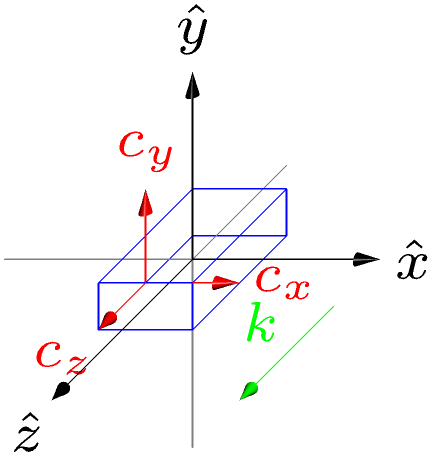

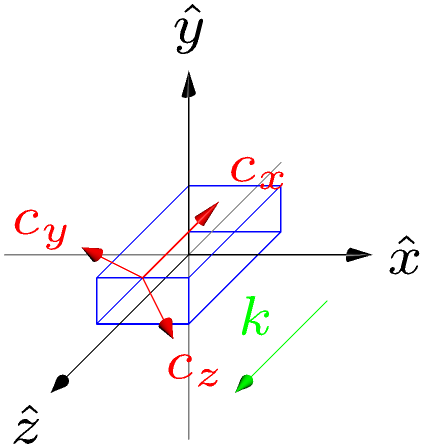

In [5]:
prefa = 'tmp_mata'
prefb = 'tmp_matb'

mat_a.make_crystal_axes_plot(prefa)
mat_b.make_crystal_axes_plot(prefb)

display(Image(prefa+'-crystal.png', width=300))

display(Image(prefb+'-crystal.png', width=300))


Observe that the crystal axes for the first material are in the default orientation aligned with the laboratory axes. The crystal axes for the second material have been rotated as described above. 
The blue box gives a sense of the orientation of the waveguide with propagation out of the screen along $\vec k \propto \hat{z}$.

## Anistropic materials

We now turn to anisotropic materials and consider GaAs which is a cubic material.



In [6]:
mat_gaas = materials.make_material("GaAs_1970_Auld")

print(mat_gaas, '\n')

print(mat_gaas.elastic_properties())

Material: GaAs [100]
  File: GaAs_1970_Auld
  Source: Auld
  Date: 1970 

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, stiffness c, unit: GPa. 
[[118.8  53.8  53.8   0.    0.    0. ]
 [ 53.8 118.8  53.8   0.    0.    0. ]
 [ 53.8  53.8 118.8   0.    0.    0. ]
 [  0.    0.    0.   59.4   0.    0. ]
 [  0.    0.    0.    0.   59.4   0. ]
 [  0.    0.    0.    0.    0.   59.4]]

  Wave mode 1: v_p=4.7313 km/s,  |v_g|=4.7313 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  4.7313] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s


With the default orientation, the separation into longitudinal and shear modes is simple, and the phase and group velocities for each mode are the same. As expected the longitudinal mode is oriented along $z$ and the degenerate shear modes like in the $x$-$y$ plane.

Things get more interesting if we start rotating the crystal. 

First, let's make a $\pi/2$ rotation around the $y$ axis:


In [7]:
nvec = np.array([0.0,1.0,0.0])
phi = np.pi/2.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(nvec, phi)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, stiffness c, unit: GPa. 
[[ 1.1880e+02  5.3800e+01  5.3800e+01  0.0000e+00 -3.2943e-15  0.0000e+00]
 [ 5.3800e+01  1.1880e+02  5.3800e+01  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 5.3800e+01  5.3800e+01  1.1880e+02  0.0000e+00  3.2943e-15  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  5.9400e+01  0.0000e+00  0.0000e+00]
 [-3.2943e-15  0.0000e+00  3.2943e-15  0.0000e+00  5.9400e+01  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  5.9400e+01]]

  Wave mode 1: v_p=4.7313 km/s,  |v_g|=4.7313 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  4.7313] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[-0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000 

Nothing changes! Since the crystal symmetry is cubic, this rotation has left the material unchanged and all the wave properties are the same.

Now let's try a $\pi/4$ rotation around the $y$ axis:

In [8]:
nvec = np.array([0.0,1.0,0.0])
phi = np.pi/4.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(nvec, phi)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, stiffness c, unit: GPa. 
[[ 1.4570e+02  5.3800e+01  2.6900e+01  0.0000e+00  7.6294e-15  0.0000e+00]
 [ 5.3800e+01  1.1880e+02  5.3800e+01  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 2.6900e+01  5.3800e+01  1.4570e+02  0.0000e+00 -7.6294e-15  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  5.9400e+01  0.0000e+00  0.0000e+00]
 [-3.8147e-15  0.0000e+00 -1.1444e-14  0.0000e+00  3.2500e+01  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  5.9400e+01]]

  Wave mode 1: v_p=5.2397 km/s,  |v_g|=5.2397 km/s,  u_j=[-0.0000  0.0000  1.0000],  v_g=[-0.0000  0.0000  5.2397] km/s
  Wave mode 2: v_p=3.3456 km/s,  |v_g|=3.3456 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000  0.0000  3.3456] km/s
  Wave mode 3: v_p=2.4747 km/s,  |v_g|=2.4747 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000 

Observe that the polarisation states indicated by the components of the $\vec u$ vectors are unchanged: there is a  longitudinal mode oriented along $z$ and two shear modes with vibrations in the $x$-y$y$ plane. But the shear modes are no longer degenerate: they have different phase and group speeds.

Things get really interesting if we apply a rotation that is not commenusare with the crytal symmetries: a positive $\pi/3$ rotation around the $[1,1,1]$ direction:

In [9]:
nvec = np.array([1.0,1.0,1.0])
phi = np.pi/3.

mat_gaas2= mat_gaas.copy()

mat_gaas2.rotate(nvec, phi)

print(mat_gaas2.elastic_properties())

Elastic properties of material GaAs_1970_Auld
  Density:        5307.000 kg/m^3
  Ref. index:     3.3702+0.0000j 
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor GaAs_1970_Auld, stiffness c, unit: GPa. 
[[150.6815  37.8593  37.8593   7.9704  -3.9852  -3.9852]
 [ 37.8593 150.6815  37.8593  -3.9852   7.9704  -3.9852]
 [ 37.8593  37.8593 150.6815  -3.9852  -3.9852   7.9704]
 [  7.9704  -3.9852  -3.9852  43.4593   7.9704   7.9704]
 [ -3.9852   7.9704  -3.9852   7.9704  43.4593   7.9704]
 [ -3.9852  -3.9852   7.9704   7.9704   7.9704  43.4593]]

  Wave mode 1: v_p=5.3341 km/s,  |v_g|=5.3484 km/s,  u_j=[-0.0400 -0.0400  0.9984],  v_g=[-0.2763 -0.2763  5.3341] km/s
  Wave mode 2: v_p=3.1034 km/s,  |v_g|=3.3219 km/s,  u_j=[ 0.7060  0.7060  0.0565],  v_g=[ 0.8378  0.8378  3.1034] km/s
  Wave mode 3: v_p=2.5860 km/s,  |v_g|=2.6583 km/s,  u_j=[-0.7071  0.7071 -0.0000],  v_g=[-0.4356 -0.4356  2.5860] km/s


Now the phase and group velocities are different and the states are hybrid modes with polarisation vectors pointing along irregular directions. Nevertheless, the first mode is close to longitudinal, the second mode is close to shear, and the third is pure shear.

### Dispersion diagrams### 
We can obtain a much fuller picture by plotting several bulk dispersion properties as a function of the wavevector in 2D and 3D:

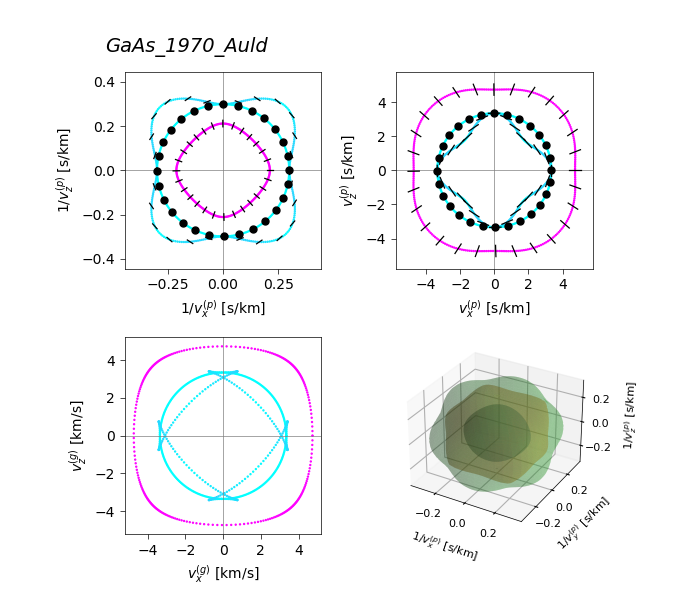

In [10]:
prefix = 'tmpgaas'

mat_gaas.plot_bulk_dispersion(prefix)

display(Image(prefix+'-bulkdisp.png'))

These plots respectively show contours of the *phase velocity* surface  (top-left), the *slowness* surface $1/v_p(\vec \kappa)$ (top-right), the *ray* or group velocity surface (bottom-left) and the full 3D slowness surface (bottom-right).

The colours in the first three plots correspond to the component of each wave mode's elastic polarisation along the propagation direction, ie $r=\hat{\kappa} \cdot \hat{u} = \hat{z} \cdot \hat{u}$. The lines and dots also indicate the polarisation states. It is apparent that the pink coloured mode is close to longitudinal and the blue modes are close to transverse (shear). It turns out that for a given wavevector, the group velocity is *normal* to the slowness surface. Tracing around the outer curve quasi-shear mode in the first plot can help to understand the cusps in the corresponding curve of the group velocity plot.

These plots are always shown in the $x-z$ plane. To see other cuts, we can rotate the crystal. Here is the case for the material that we rotated previously:

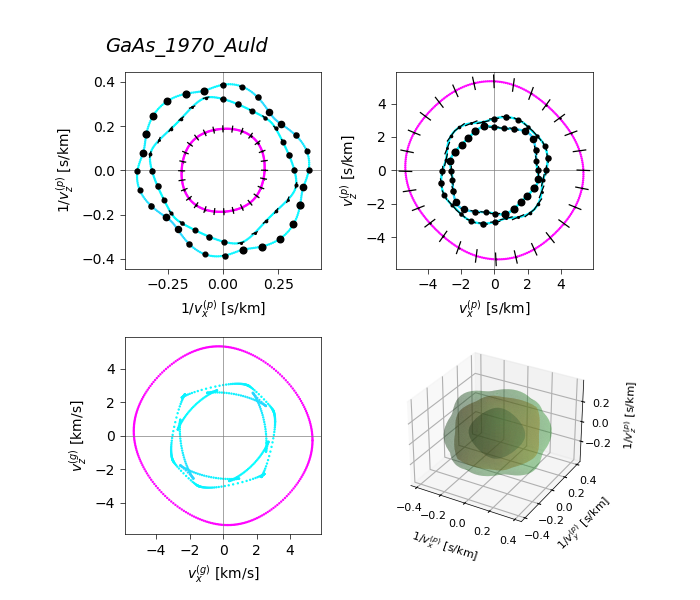

In [11]:
prefix = 'tmpgaas2'


mat_gaas2.plot_bulk_dispersion(prefix)

display(Image(prefix+'-bulkdisp.png'))

## Special crystal orientations

Rotations can be specified in several ways.

As well as the angle and unit vector, the coordinate axes can be named directly, and rotation calls can be made successively
to apply sequences of rotations:

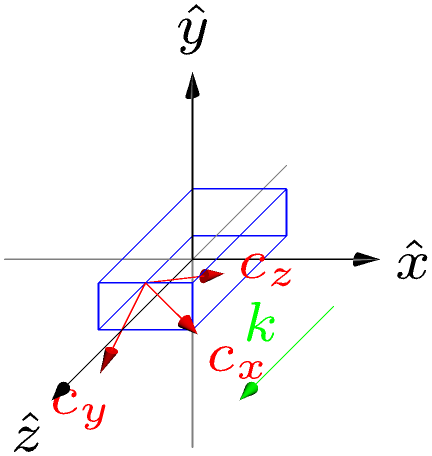

In [12]:
mat_3 = mat_a.copy()

mat_3.rotate('x-axis', np.pi/4)        # Apply a positive pi/4 rotation around the lab x axis
mat_3.rotate('z', np.pi/5)             # Now apply a positive pi/5 rotation around the lab z axis
mat_3.rotate('x-axis', -4*np.pi/3)     # Now apply a negative -4pi/3 rotation around the lab x axis

pref='tmp3'
mat_3.make_crystal_axes_plot(pref)

display(Image(pref+'-crystal.png', width=300))

To return to the starting configuration, use `reset_orientation()` (or just make a new material from scratch).

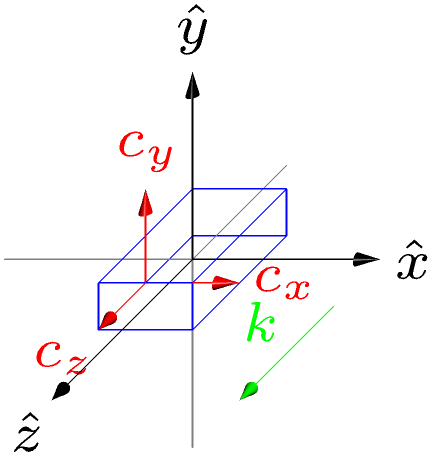

In [13]:
mat_3.reset_orientation()
mat_3.make_crystal_axes_plot(pref)

display(Image(pref+'-crystal.png', width=300))

Some materials define special directions which are commonly desired. For example, a number of materials like lithium niobate can be obtained in *x-cut*, *y-cut* or *z-cut* varieties.

The appropriate orientations can be applied using the above commands, but it is also possible to define specific rotations in the `.json` file.

For lithium niobate, which has trigonal symmetry, the default orientation is *x-cut*, with the optical symmetry axis $\hat{c}_z$ pointing along the $\hat{z}$ direction.
Selecting the *z-cut* orientation moves the $\hat{c}_z$ axis to point along $-\hat{y}$ by applying a $\pi/2$ rotation around the positive $\hat{x}$ axis:


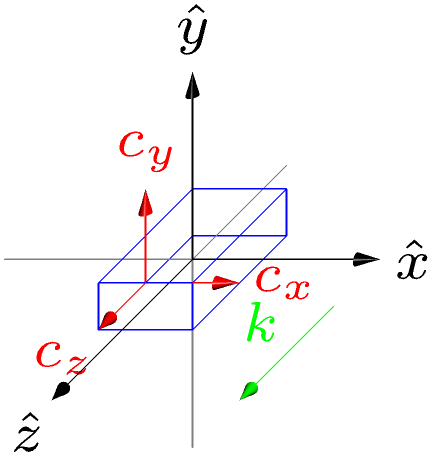

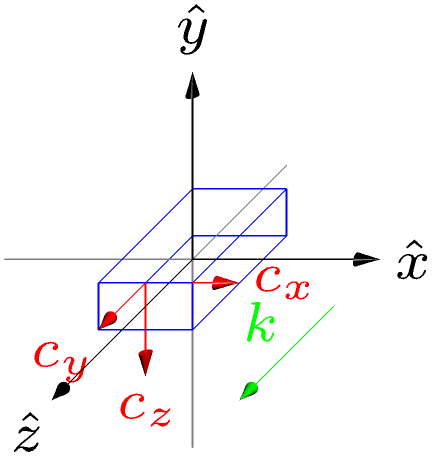

In [14]:
mat_LiNb_x = materials.make_material('LiNbO3aniso_2021_Steel')
pref='tmp_linb'

mat_LiNb_x.make_crystal_axes_plot(pref+'-xcut')
display(Image(pref+'-xcut-crystal.png', width=300))


mat_LiNb_z = mat_LiNb_x.copy()
mat_LiNb_z.set_orientation('z-cut') 

mat_LiNb_z.make_crystal_axes_plot(pref+'-zcut')
display(Image(pref+'-zcut-crystal.png', width=300))



This difference is reflected in the bulk dispersion properties of the two cases. The 3D plots are identical, but the projections in the $x$-$z$ plane are different. The $z$-cut case shows the full 6-fold symmetry of the hexagonal crystal. The orientation of the $x$-cut case leads to a 4-fold symmetry for propagation in the $x$-$z$ plane.

In [15]:

mat_LiNb_x.plot_bulk_dispersion(pref+'-xcut', label='LiNbO3 x-cut')

mat_LiNb_z.plot_bulk_dispersion(pref+'-zcut', label='LiNbO3 z-cut')


## Bulk dispersion and core-cladding guidance

A useful application of the bulk dispersion curves is as a tool to predict the guidance properties of two media by comparing their slowness curves.

Consider the first non-fibre conventional waveguide to show SBS: a chalcogenide ($\mathrm{As}_2\mathrm{S}_3$) strip waveguide on a silica substrate. 



In [16]:
mat_SiO2 = materials.make_material('SiO2_2021_Poulton')
mat_As2S3 = materials.make_material('As2S3_2021_Poulton')

print(mat_SiO2.elastic_properties(), '\n\n')

print(mat_As2S3.elastic_properties())

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s 


Elastic properties of material As2S3_2021_Poulton
  Density:        3200.000 kg/m^3
  Ref. index:     2.4500+0.0000j 
  Crystal class:  Isotropic
  c11:            18.900 GPa
  c12:            6.000 GPa
  c44:            6.400 GPa
  Young's mod E:  15.897 GPa
  Poisson ratio:  0.242
  Velocity long.: 2430.278 m/s
  Velocity shear: 1414.214 m/s


Noting that the chalcogenide refractive index is higher, we are motivated by optical guidance to use it as the core material.

We then note that both the elastic wave velocities for the chalcogenide are lower than the shear velocity for the silica. Consequently, we can expect
the chalcogenide to form a suitable elastic cladding, which is indeed the case and explains why this system successfully showed SBS in 2012.

For isotropic materials, this is sufficient investigation, but we can confirm the result by comparing the slowness curves for both materials on one plot:

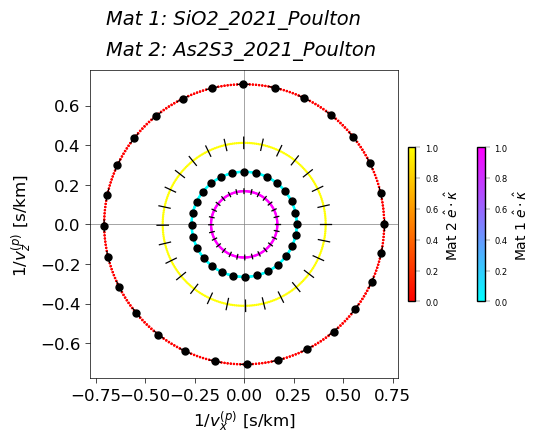

In [17]:
materials.compare_bulk_dispersion(mat_SiO2, mat_As2S3, 'comp_sio2_as2s3')

The slowness curves for silica are shown in red/orange, those for the chalcogenide are shown in blue and magenta. Since the latter are entirely contained in the former, the chalcogenide is an elastically slow material and forms an ideal cladding.

Now consider the silicon/silica or SOI system.

In [18]:
mat_SiO2 = materials.make_material('SiO2_2021_Poulton')
mat_Si = materials.make_material('Si_1970_Auld')

print(mat_SiO2.elastic_properties(), '\n\n')

print(mat_Si.elastic_properties())

Elastic properties of material SiO2_2021_Poulton
  Density:        2200.000 kg/m^3
  Ref. index:     1.4500+0.0000j 
  Crystal class:  Isotropic
  c11:            78.500 GPa
  c12:            16.100 GPa
  c44:            31.200 GPa
  Young's mod E:  73.020 GPa
  Poisson ratio:  0.170
  Velocity long.: 5973.426 m/s
  Velocity shear: 3765.875 m/s 


Elastic properties of material Si_1970_Auld
  Density:        2332.000 kg/m^3
  Ref. index:     3.5000+0.0000j 
  Crystal class:  Cubic
  Stiffness c_IJ:
Voigt tensor Si_1970_Auld, stiffness c, unit: GPa. 
[[165.7   79.56  79.56   0.     0.     0.  ]
 [ 79.56 165.7   79.56   0.     0.     0.  ]
 [ 79.56  79.56 165.7    0.     0.     0.  ]
 [  0.     0.     0.    63.9    0.     0.  ]
 [  0.     0.     0.     0.    63.9    0.  ]
 [  0.     0.     0.     0.     0.    63.9 ]]

  Wave mode 1: v_p=8.4294 km/s,  |v_g|=8.4294 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  8.4294] km/s
  Wave mode 2: v_p=5.2346 km/s,  |v_g|=5.2346 km/s, 

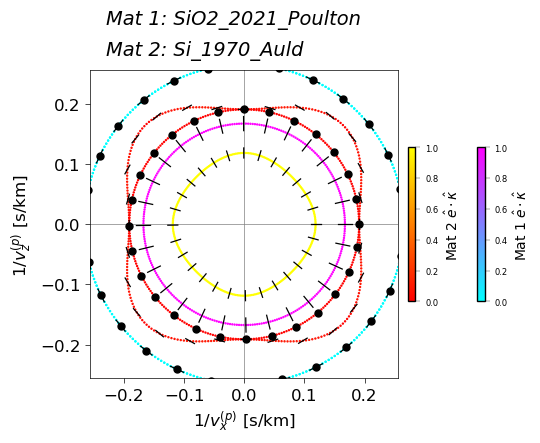

In [19]:
materials.compare_bulk_dispersion(mat_SiO2, mat_Si, 'comp_sio2_si')

Here we see that the slowness curves are interleaved but both families of waves are slower in silica than their corresponding modes in silicon. Consequently, we can't guide both sound and light in a conventional SOI waveguide, and all SBS demonstrations in this class of platform have involved special techniques such as undercut waveguides or pillar structures.

A similar case arises with lithium niobate and silica (and a number of other potential substrates). Lithium niobate and silica form an excellent core-cladding combination for light guidance but the elastic wave situation is as follows:

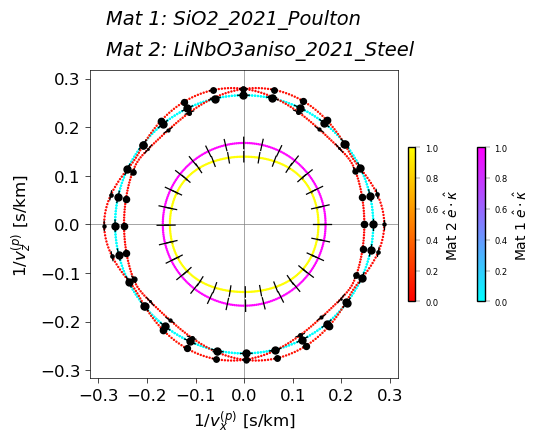

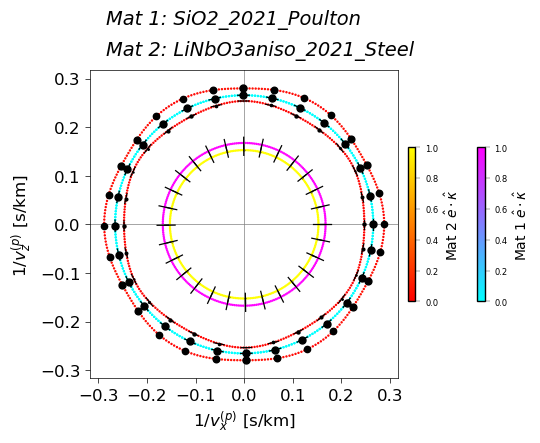

In [20]:

materials.compare_bulk_dispersion(mat_SiO2, mat_LiNb_x, 'comp_sio2_linb_x')

materials.compare_bulk_dispersion(mat_SiO2, mat_LiNb_z, 'comp_sio2_linb_z')

This material combination fails for both common crystal orientations.

However, as several groups have realised, while these elastic properties forbid total internal reflection elastic guidance
in a conventional waveguide, and it does not forbid efficient elastic guidance as a Rayleigh-like surface mode.